##
1. 다음 그림을 참조하여 함수 f(x)=2*sin(x)+0.5*x  (단, 1 <= x <= 13)의 최소값을 제시된 방법으로 구하시오. 
		
 1) 미분법을 이용 (5)
 2) 뉴톤법을 이용(초기값 x=13) (10)
 3) 경사하강법(초기값 x=13, 학습율=최소값을 찾을 수 있도록 본인이 조절) (20)

# 
기본 코드

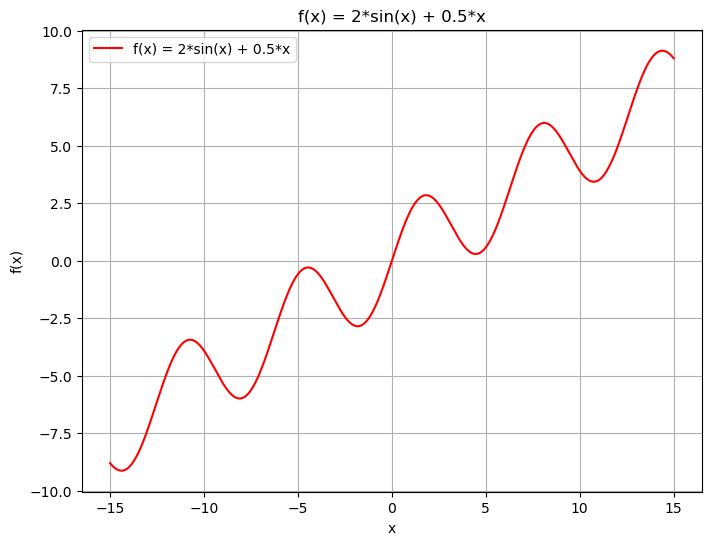

f(x)는 x가 [-14.3897878]일 때 최솟값 -9.131415267835383을 가진다


In [47]:
# 라이브러리 불러오기
from sympy import *
import sympy as s
import numpy as np
import matplotlib.pyplot as plt
import math as m
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from matplotlib.pyplot import style

style.use('default')

# f(x) = 2*sin(x)+0.5*x 함수 
def f(x0):
    return 2 * np.sin(x0) + 0.5 * x0


# x 좌표 (-15부터 15까지 동일한 비율로 50000개 나누겠다는 뜻 )
# x = np.linspace(-15, 15, 5)
x0 = np.linspace(-15, 15, 50000)

# y 좌표
y0 = f(x0)

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(x0, y0, label='f(x) = 2*sin(x) + 0.5*x', color='red')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('f(x) = 2*sin(x) + 0.5*x')
plt.grid(True)
plt.legend()
plt.show()

# 최솟값
print(f'f(x)는 x가 {x0[np.where(y0 == min(y0))]}일 때 최솟값 {min(y0)}을 가진다')


#
- 미분법을 사용

In [48]:
x = symbols("x")
Derivative(2 * sin(x) + 0.5 * x, x).doit()
# = diff(2 * sin(x) + 0.5*x , x)


2*cos(x) + 0.5

In [49]:
def f(x):
    return 2 * sin(x) + 0.5 * x


def fp(x):
    return 2 * np.cos(x) + 0.5 


x1 = np.linspace(-15, 15, 50000)
y1 = fp(x1)


print(f'f(x)는 x가 {x0[np.where(y0 == min(y0))]}일 때 최솟값 {min(y0)}을 가진다')


f(x)는 x가 [-14.3897878]일 때 최솟값 -9.131415267835383을 가진다


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


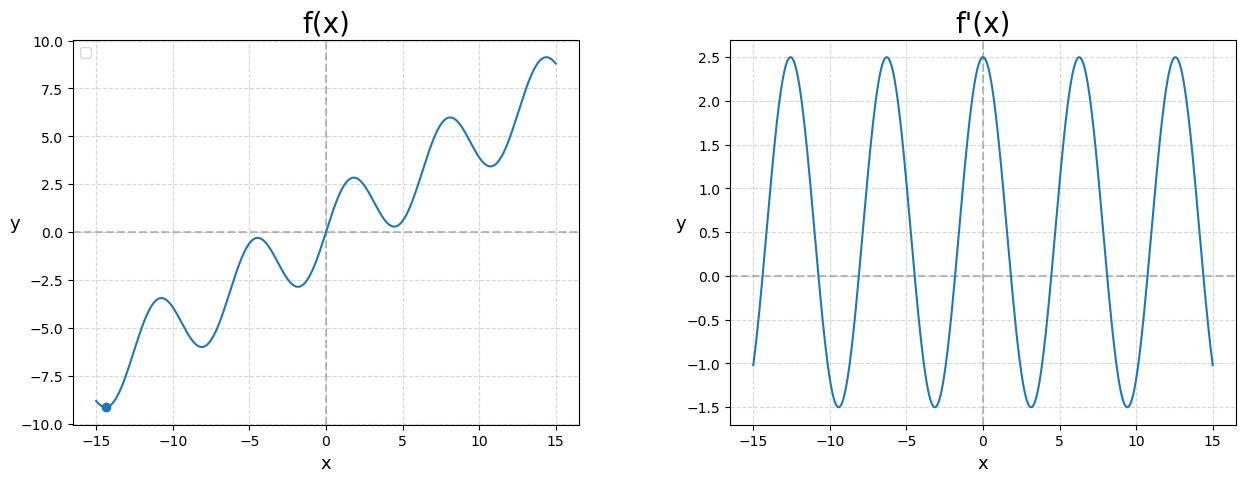

In [50]:
f, axes = plt.subplots(1, 2)
f.set_size_inches((15, 5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

axes[0].set_title("f(x)", fontsize=20)
axes[0].set_xlabel('x', fontsize=13)
axes[0].set_ylabel('y', fontsize=13, rotation=0)
axes[0].axvline(0.0, color='gray', linestyle="--", alpha=0.5)
axes[0].axhline(0.0, color='gray', linestyle="--", alpha=0.5)
axes[0].plot(x0, y0)
axes[0].grid(True, alpha=0.5, linestyle='--')
axes[0].scatter(x0[np.where(y0 == min(y0))], min(y0))
axes[0].legend(loc='upper left')

axes[1].set_title("f'(x)", fontsize=20)
axes[1].set_xlabel('x', fontsize=13)
axes[1].set_ylabel('y', fontsize=13, rotation=0)
axes[1].axvline(0.0, color='gray', linestyle="--", alpha=0.5)
axes[1].axhline(0.0, color='gray', linestyle="--", alpha=0.5)
axes[1].plot(x1, y1)
axes[1].grid(True, alpha=0.5, linestyle='--')


#
- 뉴톤법을 이용(초기값 x=13)

In [51]:
x = symbols('x')

f_x = 2 * sin(x) + 0.5*x  # 원함수
fp_x = diff(f_x)

x_init = 13  # 초기값 지정
Tol = 0.0001  # 허용오차

x_t = x_init
i = 0

while True:  # 오차값이 허용오차 이내일때까지 반복한다
    i = i + 1

    # x, f(x)를 지나는 접선의 x절편을 구한다.
    # 함수이름.subs(a, b)는 a에 b를 대입하겠다는 뜻이다
    x_tp1 = float(x_t) - float(f_x.subs(x, x_t))/float(fp_x.subs(x, x_t))

    # x값을 접선의 x절편으로 변경한다.
    error = f_x.subs(x, x_tp1)

    if error <= Tol:  # 오차값이 0이라고 해도 될 정도로 작은 값이라면 종료한다(허용오차이내)
        break
    x_t = x_tp1

print(f'반복 횟수: {i}')
print(f'근사해 x = {x_tp1}')
print(f'근사해일 때 최솟값 : {f_x.subs(x,x_tp1)}')


반복 횟수: 19
근사해 x = -1.7841324780697434
근사해일 때 최솟값 : -2.84672627816063


# 
경사하강법(초기값 x=13, 학습율=최소값을 찾을 수 있도록 본인이 조절)

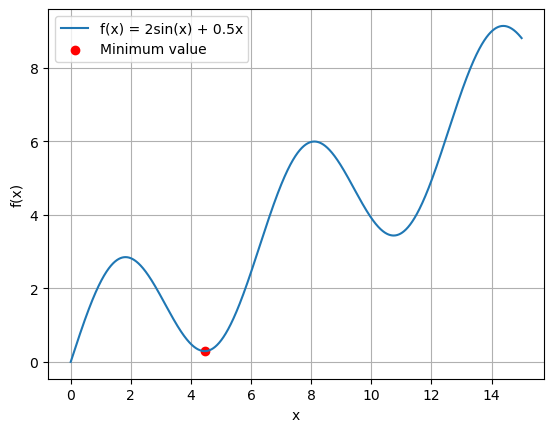

In [52]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return 2 * np.sin(x) + 0.5 * x


def gradient(x):
    return 2 * np.cos(x) + 0.5


def gradient_descent(learning_rate=0.1, initial_x=13, epsilon=1e-6, max_iterations=90000):
    x = initial_x
    iteration = 0
        
    while iteration < max_iterations:
        gradient_value = gradient(x)
        x_new = x - learning_rate * gradient_value

        if abs(f(x_new) - f(x)) < epsilon:
            break

        x = x_new
        iteration += 1

    return x, f(x)


# 경사하강법으로 최소값 구하기 (초기값을 13으로 고정)
learning_rate = 1.73455050555
# 1.73455
initial_x = 13
result_x, min_value = gradient_descent(learning_rate, initial_x)

# 시각화
x_vals = np.linspace(0, 15, 100000)
plt.plot(x_vals, f(x_vals), label='f(x) = 2sin(x) + 0.5x')
plt.scatter(result_x, min_value, color='red', label='Minimum value')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('')
plt.legend()
plt.grid(True)
plt.show()


##
2. 회귀분석(다음 데이터를 이용하여 회귀분석을 실시하시오) (15) 
 - p_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
 - p_weight = [242, 290, 340, 363, 430, 450, 500, 390, 450, 500, 475, 500, 500, 340, 600, 600, 700, 700, 610, 650, 575, 685, 620, 680, 700, 725, 720, 714, 850, 1000, 920, 955, 925, 975, 950, 6.7,     7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [53]:
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error  


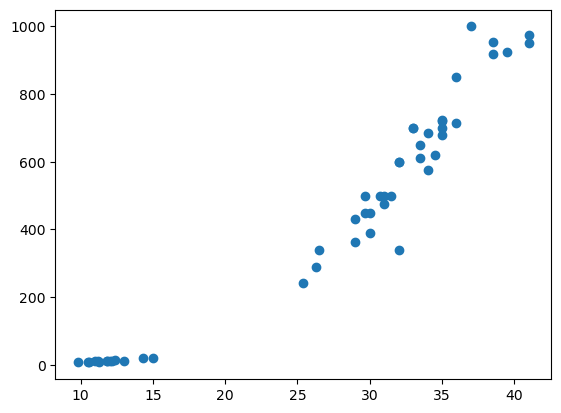

In [54]:

x = np.array([25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
     35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0])
y = np.array([242, 290, 340, 363, 430, 450, 500, 390, 450, 500, 475, 500, 500, 340, 600, 600, 700, 700, 610, 650, 575, 685, 620, 680, 700,
     725, 720, 714, 850, 1000, 920, 955, 925, 975, 950, 6.7,     7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9])


plt.scatter(x, y)


In [55]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

model = LinearRegression() 
X_train = x_train[:, np.newaxis]
model.fit(X_train, y_train)  

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(x_test[:, np.newaxis])

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("학습 데이터 평균 제곱 오차 (MSE,잔차):", mse_train)
print("테스트 데이터 평균 제곱 오차 (MSE,잔차):", mse_test)

print("학습 RMSE: ", np.sqrt(mse_train))
print("테스트 RMSE: ", np.sqrt(mse_test))


학습 데이터 평균 제곱 오차 (MSE,잔차): 7709.381713046898
테스트 데이터 평균 제곱 오차 (MSE,잔차): 10172.951817153113
학습 RMSE:  87.80308487204135
테스트 RMSE:  100.86105203275005


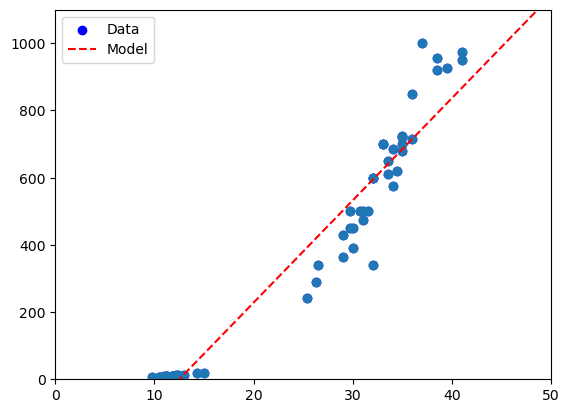

In [56]:
xfit = np.linspace(0, 50, 100)
Xfit = xfit[:, np.newaxis]  
yfit = model.predict(Xfit) 

plt.scatter(x, y, label="Data", color="blue")
plt.plot(xfit, yfit, "--r", label="Model")
plt.scatter(x, y)
plt.ylim(0, 1100)
plt.xlim(0,50)
plt.legend()
plt.show()
print()


##
3. 분류(강의 10. 의사결정트리 파일 p.2 의 데이터를 사용하여 의사결정트리를 생성하시오.) (15)

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.3,  random_state=11)

dt_clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=156)

 ## 
 4. 비지도 학습(다음과 같은 2가지의 속성을 가지는 15개의 데이터 집합이 주어지고 이들 데이터를 유사성이 높은 2개의 군집으로 구성하고자 할 때, 가장 적절한 군집구성 방안을 K-평균 알고리즘을 이용하여 결정하시오.) (15)

 
        데이터
속성1 1,4,3,4,5,2,7,1,5,5,4,6,3,5,4
속성2 2,5,2,6,5,3,6,5,4,3,6,2,5,6,1


In [59]:
import numpy as np
from sklearn.cluster import KMeans

data = np.array([[1, 2],
                 [4, 5],
                 [3, 2],
                 [4, 6],
                 [5, 5],
                 [2, 3],
                 [7, 6],
                 [1, 5],
                 [5, 4],
                 [5, 3],
                 [4, 6],
                 [6, 2],
                 [3, 5],
                 [5, 6],
                 [4, 1]])

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print("군집화 결과:")
print("데이터 포인트의 군집 할당:", labels)
print("군집 중심점 좌표:")
print(centroids)


군집화 결과:
데이터 포인트의 군집 할당: [1 0 1 0 0 1 0 1 0 0 0 0 0 0 1]
군집 중심점 좌표:
[[4.8 4.8]
 [2.2 2.6]]


##
5. 보스톤 주택가격 데이터셋(사이킷런에서 load_boston()으로 불러옴)으로 아래 사항을 고려하여 주택가격을 예측하는 단순선형회귀 분석을 실시하시오(프로그램, 결과, 설명 제시). (25)
  - Target 변수=주택가격, 독립 변수= LSTAT(인구 중 하위 계층 비율)
  1) 회귀계수  와  을 수식  ,  으로 구하시오. 
 2) 회귀계수  와  을 경사하강법으로 구하시오. 

##
6. “타이타닉” 데이터 셋을 사용하여, 로지스틱회귀와 의사결정트리 알고리즘들을 적용하고 그 결과를 설명하시오. (40)

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# 데이터 불러오기
df = pd.read_csv('titanic.csv')


# 필요한 특성 선택
selected_features = ['pclass', 'sex', 'age','survived']
df = df[selected_features]


# 결측치 처리
df['age'].fillna(df['age'].mean(), inplace=True)
df['survived'].fillna(0, inplace=True)
df['pclass'].fillna("NaN", inplace=True)
df['pclass'].fillna("NaN", inplace=True)
# df['Embarked'].fillna("NaN", inplace=True)


# 범주형 변수 레이블 인코딩
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['age'] = label_encoder.fit_transform(df['age'])
df['survived'] = label_encoder.fit_transform(df['survived'])
df['sex'] = label_encoder.fit_transform(df['sex'])


# 독립 변수와 종속 변수 분리
X = df.drop('survived', axis=1)
y = df['survived']


# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 로지스틱 회귀 모델 초기화
logreg_model = LogisticRegression()

# 로지스틱 회귀 모델 학습
logreg_model.fit(X_train, y_train)

# 예측
y_pred_logreg = logreg_model.predict(X_test)

# 결과 출력
print("로지스틱 회귀 결과:")
print("정확도:", accuracy_score(y_test, y_pred_logreg))
print("분류 보고서:\n", classification_report(y_test, y_pred_logreg))


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 의사결정트리 모델 초기화
dtree_model = DecisionTreeClassifier()

# 의사결정트리 모델 학습
dtree_model.fit(X_train, y_train)

# 예측
y_pred_dtree = dtree_model.predict(X_test)

# 결과 출력
print("\n의사결정트리 결과:")
print("정확도:", accuracy_score(y_test, y_pred_dtree))
print("분류 보고서:\n", classification_report(y_test, y_pred_dtree))


##
7. 최단경로문제(S에서 T로 가는 최단경로를 구하시오.) (20)